<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Distance Metrics**


## Use cases of Distance Metrics

- **Classification**: KNN model uses a distance metric to find a data point's top k nearest neighbors.
- **Clustering**: K-Means algorithm assigns data points to the nearest centroids using a distance metric.
- **Natural Language Processing**: NLP uses the cosine similarity distance metric to filter out irrelevant documents from the corpus once the unstructured data is transformed into vector form.


## Why different distance metrics matter?

There are many ways to define the distance between two objects. To give you a real-life example, suppose you want to go from one city to another on a map, there will be at least two different distances. One is the driving distance and the other could be the flying distance. Depending on how you choose to travel, one of the distances could make completely no sense to you. 

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/images/distance.jpg" width="60%">

Image from [PxHere](https://pxhere.com/en/photo/718584?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01)


Same idea applies to Machine Learning, choosing the correct distance metric is critical to the performance of the downstream task.

In this notebook, you will practice applying the distance metrics learned in this course. Using real-world data, you will analyze similarities and dissimilarities in data. You will also be able to understand how various algorithms such as DBSCAN are affected by different distance metrics.


## __Table of Contents__

<!-- <a href="#Principle-Component-Analysis">Principle Component Analysis</a> -->
<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li><a href="#Datasets">Datasets</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="#Defining-helper-functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li>
        <a href="#Euclidean-Distance">Euclidean Distance</a>
        <ol>
            <li><a href="#euclidean_GE">General Equation</a></li>
        </ol>
    </li>
    <li>
        <a href="#Manhattan-Distance">Manhattan Distance</a>
        <ol>
            <li><a href="#manhattan_GE">General Equation</a></li>
        </ol>
    </li>
    <li>
        <a href="#Cosine-Distance">Cosine Distance</a>
        <ol>
            <li><a href="#cosine_GE">General Equation</a></li>
        </ol>
    </li>
    <li>
        <a href="#Analyzing-Distance-Metrics-with-DBSCAN">Analyzing Distance Metrics with DBSCAN</a>
        <ol>
            <li><a href="#DBSCAN-using-Euclidean:">DBSCAN using Euclidean</a></li>
        </ol>
        <ol>
            <li><a href="#DBSCAN-using-Manhattan:">DBSCAN using Manhattan</a></li>
        </ol>
        <ol>
            <li><a href="#DBSCAN-using-Cosine:">DBSCAN using Cosine</a></li>
        </ol>
    </li>
    <li>
        <a href="#Jaccard-Distance">Jaccard Distance</a>
        <ol>
            <li><a href="#jaccard_GE">General Equation</a></li>
        </ol>
    </li>
</ol>

<a href="#Exercises">Exercises</a>
<ol>
    <li><a href="#Exercise-1---Jaccard-distance">Exercise 1 - Jaccard distance</a></li>
    <li><a href="#Exercise-2---Euclidean-distance-and-manhattan-distance">Exercise 2 - Euclidean distance and manhattan distance</a></li>
    <li><a href="#Exercise-3---Cosine-distance">Exercise 3 - Cosine Distance</a></li>
    <li><a href="#Exercise-4---Using-sklearn.metrics.pairwise">Exercise 4 - Using <code>sklearn.metrics.pairwise</code></a></li>
</ol>


## Objectives


After completing this lab you will be able to:


* __Understand__ the mathematics behind the euclidean, manhattan, cosine, and jaccard distance metrics.
* __Understand__ the use cases of the covered distance metrics.


## Datasets

Datasets for this lab are gathered from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) under the MIT License.


## Setup


For this lab, we will be using the following libraries:
 - [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for managing the data.
 - [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for mathematical operations.
 - [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for visualizing the data.
 - [`scipy`](https://docs.scipy.org/doc/scipy/reference/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for complex numerical operations.
 - [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for machine learning and machine-learning-pipeline related functions.


### Importing Required Libraries


In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.spatial.distance import euclidean, cityblock, cosine
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import jaccard_score

In [2]:
import warnings

warnings.filterwarnings('ignore')

### Defining Helper Functions

In the section below, we will define helper functions that will help analyze different distance metrics

__Average Distance__

This function will return the average distance between two sets of data given our provided distance metric, i.e., each point in $X$ with each other point in $Y$. Refer to the image below:


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/images/avg_distance.png" width="30%" height="auto/">


In [5]:
def avg_distance(X1, X2, distance_func):
    res = 0
    for x1 in X1:
        for x2 in X2:
            if distance_func == jaccard_score:
                res += 1 - distance_func(x1, x2)
            else:
                res += distance_func(x1, x2)
    return res / (len(X1) * len(X2))

__Pairwise Distance__

This function will return the average pairwise distance between two sets of data. The distance for each row in $X$ from the corresponding row in $Y$. The number of rows of in the two sets of data should be equal. Refer to the image below:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/images/pairwise_distance.png" width="30%" height="auto">


In [6]:
def avg_pairwise_distance(X1, X2, distance_func):
    return sum(map(distance_func, X1, X2)) / min(len(X1), len(X2))

## Load the datafile into `pandas.DataFrame`

Before working with the data, it must be loaded into a `pandas.DataFrame`:


In [7]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/iris.csv')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
Y_COLUMN = 'species'

In [10]:
df.drop('petal_width', axis=1, inplace=True)

In [11]:
species = df[Y_COLUMN].unique()
print(species)

['setosa' 'versicolor' 'virginica']


Let's view the three species of irises' data in 3D using `matplotlib`

In [12]:
attrs = [colname for colname in df.columns if colname != Y_COLUMN]
attrs

['sepal_length', 'sepal_width', 'petal_length']

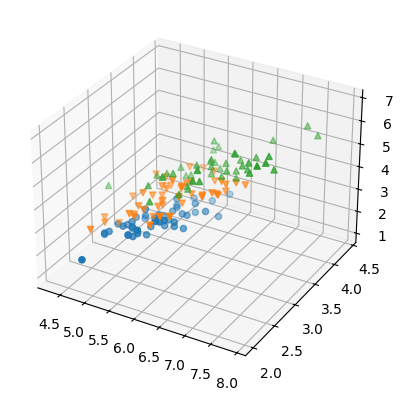

In [13]:
markers = ['o', 'v', '^']
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for specie, marker in zip(species, markers):
    specie_mask = (df['species'] == specie)
    specie_data = df.loc[specie_mask][attrs]
    xs, ys, zs = [specie_data[attr] for attr in attrs]
    ax.scatter(xs, ys, zs, marker=marker)

plt.show()

Create variables for the species' data, as `np.ndarray`s:


In [ ]:
setosa_data = df.loc[df['species'] == 'setosa'][attrs].to_numpy()
versicolor_data = df.loc[df['species'] == 'versicolor'][attrs].to_numpy()
virginica_data = df.loc[df['species'] == 'virginica'][attrs].to_numpy()